In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_state_qsphere
from qiskit.quantum_info import Operator

In [2]:
# Function to apply QPE to generate a random number
def qpe_random_number(n_qubits):
    # Create a quantum circuit with n qubits for the phase register and 1 qubit for the target
    qc = QuantumCircuit(n_qubits + 1, n_qubits)
    
    # Apply Hadamard gate on all phase qubits (create superposition)
    for qubit in range(n_qubits):
        qc.h(qubit)
    
    # Apply controlled Rz gates with random phases
    for qubit in range(n_qubits):
        random_angle = np.random.uniform(0, 2 * np.pi)
        qc.crz(random_angle, qubit, n_qubits)  # Apply controlled-Rz with random phase to each qubit
    
    # Apply inverse Quantum Fourier Transform (QFT) to the phase register
    iqft = QFT(num_qubits=n_qubits, inverse=True, insert_barriers=True)
    qc.append(iqft, range(n_qubits))
    
    # Measure the phase register qubits
    qc.measure(range(n_qubits), range(n_qubits))
    sampler = Sampler()
    job = sampler.run(circuits=qc, shots=1024)
    result = job.result()

# Get the result counts and convert quasi-probabilities to probabilities
    counts = result.quasi_dists[0].binary_probabilities()
    random_binary = max(counts, key=counts.get)  # The most frequent outcome
    random_number = int(random_binary, 2)
    
    return random_number

In [3]:
samples = 1000
sample_random = []
for i in range (samples):
    n = 4
    sample_random.append(qpe_random_number(n))

/var/folders/sn/4ym_qb8x0cs_f961d78kvvkc0000gn/T/ipykernel_61361/2706292456.py:21: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


(array([ 53.,   0.,   2.,   0., 186.,  67.,  14.,  94., 149., 435.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

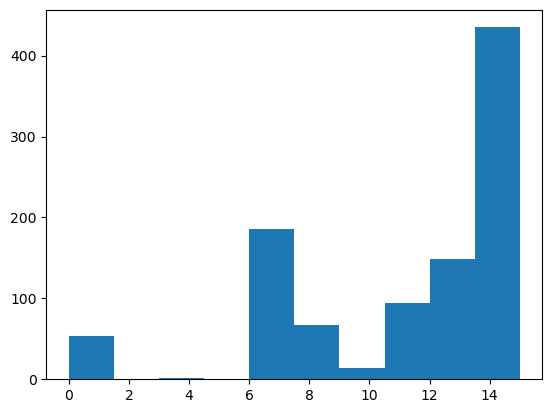

In [4]:
plt.hist(sample_random)

In [ ]:
def rng_qpe(nqubits):
    # create quantum circuit
    qc = QuantumCircuit(nqubits+1, nqubits)
    # prepare eigenstate
    qc.x(nqubits)
    qc.h(nqubits)
    # step 1: add hadamard
    for qubit in range(nqubits):
        qc.h(qubit)
        qc.barrier()
    # step 2: controlled unitary operations
    for reg1_index in range(nqubits):
        repetitions = 2**reg1_index
        random_angle = np.random.uniform(0, 4*np.pi)
        qc.crx(repetitions* random_angle, reg1_index, nqubits)
    qc.barrier()
    # step 3: IQFT on the first register
    iqft = QFT(num_qubits=nqubits, inverse=True, insert_barriers=True)
    qc.append(iqft, range(nqubits))
    qc.barrier()
    # step 4: measurement
    for reg1_index in range(nqubits):
        qc.measure(reg1_index, reg1_index)
    # qc.draw(output='mpl').savefig('qpe_4.pdf')
    sampler = Sampler()
    job = sampler.run(circuits=qc, shots=5000)
    result = job.result()
    counts = result.quasi_dists[0].binary_probabilities()
    random_binary = max(counts, key=counts.get)  # The most frequent outcome
    random_number = int(random_binary, 2)
    
    return random_number, random_angle

In [41]:
samples = 2000
sample_random = []
angles = []
for i in range (samples):
    n = 4
    rn,ra = rng_qpe(n)
    sample_random.append(rn)
    angles.append(ra)

/var/folders/sn/4ym_qb8x0cs_f961d78kvvkc0000gn/T/ipykernel_61361/410450505.py:25: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


(array([255., 129., 277., 131., 239., 123., 248., 119., 264., 215.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

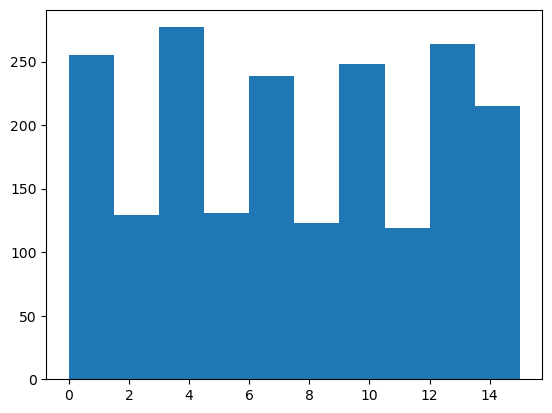

In [42]:
plt.hist(sample_random)

(array([[1., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 2.],
        [0., 0., 1., ..., 1., 0., 0.],
        ...,
        [2., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([2.67870401e-05, 6.28299607e-01, 1.25657243e+00, 1.88484525e+00,
        2.51311807e+00, 3.14139089e+00, 3.76966370e+00, 4.39793652e+00,
        5.02620934e+00, 5.65448216e+00, 6.28275498e+00]),
 <a list of 1000 BarContainer objects>)

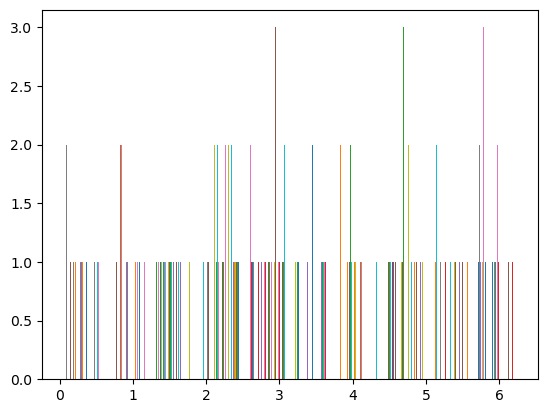

In [8]:
plt.hist(random_angles)